# ANIMAL STATE PREDICTION

In [704]:
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

In [705]:
cd C:\Users\Hardik Airen\Animal State Prediction

C:\Users\Hardik Airen\Animal State Prediction


### Read , Explore , Clean Data

In [706]:
train = pd.read_csv('train.csv')

In [707]:
train_copy = pd.read_csv('train.csv')

In [708]:
test = pd.read_csv('test.csv')

In [709]:
train.describe()

,dob_year,dob_month,count,age_upon_intake_(days),age_upon_intake_(years),intake_month,intake_year,intake_hour,intake_number,time_in_shelter_days,age_upon_outcome_(days),age_upon_outcome_(years),outcome_month,outcome_year,outcome_hour,outcome_number
count,47803.000000,47803.000000,47803.0,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000,47803.000000
mean,2012.197728,6.337531,1.0,841.679915,2.305972,6.596113,2014.600046,13.549087,1.144552,17.143366,855.319729,2.343342,6.650587,2014.638893,14.381545,1.144552
std,3.068255,3.342038,0.0,1100.557953,3.015227,3.460172,0.905731,3.179397,0.500055,46.600727,1103.598596,3.023558,3.490263,0.912706,3.456145,0.500055
min,1992.000000,1.000000,1.0,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000,0.000694,0.000000,0.000000,1.000000,2013.000000,0.000000,1.000000
25%,2011.000000,4.000000,1.0,60.000000,0.164384,4.000000,2014.000000,11.000000,1.000000,1.049653,90.000000,0.246575,4.000000,2014.000000,12.000000,1.000000
50%,2013.000000,6.000000,1.0,365.000000,1.000000,7.000000,2015.000000,13.000000,1.000000,4.972222,365.000000,1.000000,7.000000,2015.000000,15.000000,1.000000
75%,2014.000000,9.000000,1.0,1095.000000,3.000000,10.000000,2015.000000,16.000000,1.000000,13.113889,1095.000000,3.000000,10.000000,2015.000000,17.000000,1.000000
max,2016.000000,12.000000,1.0,8030.000000,22.000000,12.000000,2018.000000,23.000000,13.000000,1606.194444,8030.000000,22.000000,12.000000,2018.000000,23.000000,13.000000


#### Feature outcome_datetime has many missing values and it is not necessary as we have outcome date features separately. We remove that

In [710]:
train = train.drop(['intake_datetime','outcome_datetime'],axis=1)
test = test.drop(['intake_datetime','outcome_datetime'],axis=1)

In [711]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47803 entries, 0 to 47802
Data columns (total 35 columns):
animal_id_outcome             47803 non-null object
dob_year                      47803 non-null int64
dob_month                     47803 non-null int64
age_upon_intake               47803 non-null object
animal_type                   47803 non-null object
breed                         47803 non-null object
color                         47803 non-null object
intake_condition              47803 non-null object
intake_type                   47803 non-null object
sex_upon_intake               47802 non-null object
count                         47803 non-null int64
age_upon_intake_(days)        47803 non-null int64
age_upon_intake_(years)       47803 non-null float64
age_upon_intake_age_group     47803 non-null object
intake_month                  47803 non-null int64
intake_year                   47803 non-null int64
intake_monthyear              47803 non-null object
intake_weekd

In [712]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31869 entries, 0 to 31868
Data columns (total 34 columns):
animal_id_outcome             31869 non-null object
dob_year                      31869 non-null int64
dob_month                     31869 non-null int64
age_upon_intake               31869 non-null object
animal_type                   31869 non-null object
breed                         31869 non-null object
color                         31869 non-null object
intake_condition              31869 non-null object
intake_type                   31869 non-null object
sex_upon_intake               31869 non-null object
count                         31869 non-null int64
age_upon_intake_(days)        31869 non-null int64
age_upon_intake_(years)       31869 non-null float64
age_upon_intake_age_group     31869 non-null object
intake_month                  31869 non-null int64
intake_year                   31869 non-null int64
intake_monthyear              31869 non-null object
intake_weekd

#### Since the data doesnot contain any missing values we don not need any techniques for it . We can directly analyze it. 

In [713]:
train.head()

,animal_id_outcome,dob_year,dob_month,age_upon_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,...,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_month,outcome_year,outcome_monthyear,outcome_weekday,outcome_hour,outcome_number,outcome_type
0,A006100,2007,7,10 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,...,3650,10.0,"(7.5, 10.0]",12,2017,2017-12,Thursday,0,1.0,Return to Owner
1,A006100,2007,7,7 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,2555,7.0,"(5.0, 7.5]",12,2014,2014-12,Saturday,16,2.0,Return to Owner
2,A006100,2007,7,6 years,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,...,2190,6.0,"(5.0, 7.5]",3,2014,2014-03,Saturday,17,3.0,Return to Owner
3,A047759,2004,4,10 years,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,...,3650,10.0,"(7.5, 10.0]",4,2014,2014-04,Monday,15,1.0,Missing
4,A134067,1997,10,16 years,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,...,5840,16.0,"(15.0, 17.5]",11,2013,2013-11,Saturday,11,1.0,Return to Owner


#### Starting with dob_year we can make different dob_group based on the range

In [714]:
import re
data = [train,test]
for dataset in data:
    dataset['dob_year'] = dataset['dob_year'].astype(int)
    dataset.loc[ dataset['dob_year'] <= 1995, 'dob_group'] = 0
    dataset.loc[(dataset['dob_year'] > 1995) & (dataset['dob_year'] <= 2000), 'dob_group'] = 1
    dataset.loc[(dataset['dob_year'] > 2000) & (dataset['dob_year'] <= 2005), 'dob_group'] = 2
    dataset.loc[(dataset['dob_year'] > 2005) & (dataset['dob_year'] <= 2010), 'dob_group'] = 3
    dataset.loc[(dataset['dob_year'] > 2010) & (dataset['dob_year'] <= 2015), 'dob_group'] = 4
    dataset.loc[ dataset['dob_year'] > 2015, 'dob_group'] = 5

### Visualizing 'outcome_type' and 'dob_group'

G:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


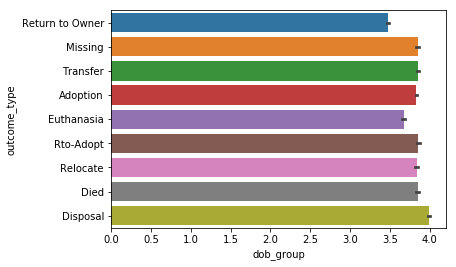

In [715]:
import seaborn as sns
sns.barplot(x='dob_group',y='outcome_type',data=train)

#### Remove Duplicates (if any)

In [716]:
train.drop_duplicates(subset='animal_id_outcome', keep='first', inplace=True)

#### As three features  'age_upon_intake' ,  'age_upon_intake_(days)' , 'age_upon_intake_(years)'  represent the age only, we will keep only one and drop the other two

In [717]:
train = train.drop(['age_upon_intake','age_upon_intake_(days)'],axis=1)
test = test.drop(['age_upon_intake','age_upon_intake_(days)'],axis=1)


In [718]:
train['age_upon_intake'] = train['age_upon_intake_(years)']
test['age_upon_intake'] = test['age_upon_intake_(years)']

### Visualizing age upon intake

We can observe that the most common age intake is 1 years and the second most is 2 years

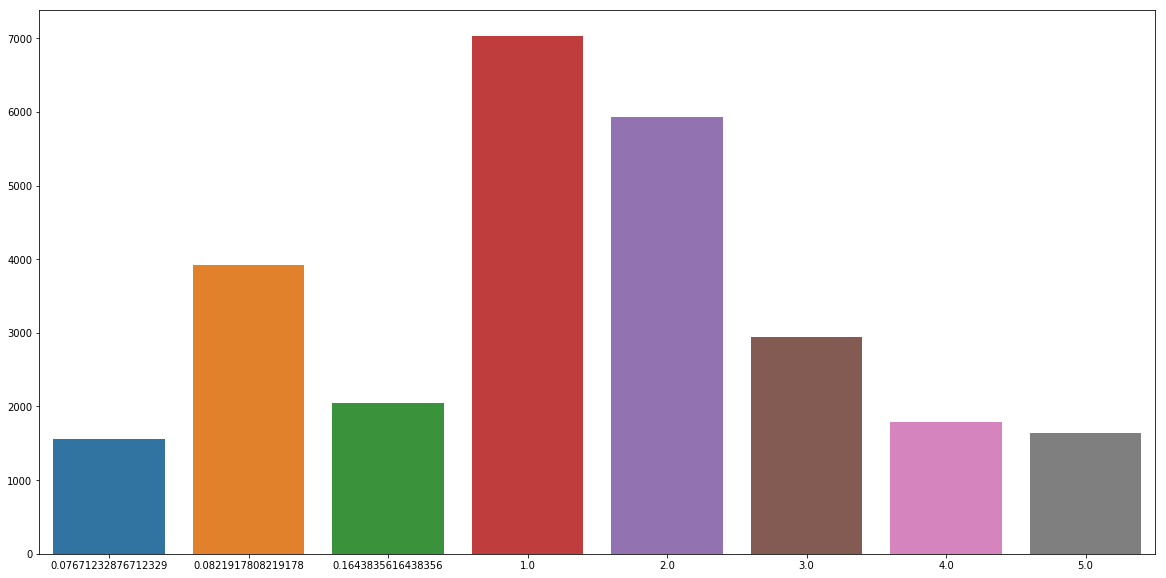

In [719]:
age= train['age_upon_intake'].value_counts().head(8)
plt.figure(figsize=(20,10))
sns.barplot(age.index, age.values)

#### As there are many features that can be classified I created a function that can easily convert objects to numerical classes for feeding it into the DataFrame

In [720]:
my_dict={}
def func(my_list):
    x=0
    for i in my_list:
        val = i
        my_dict[val]=x
        x=x+1

### Working on type of animals 

##### We observe that almost 90% of animals in Welfare Centers are Dogs and Cats. So will study about Dogs and Cats more

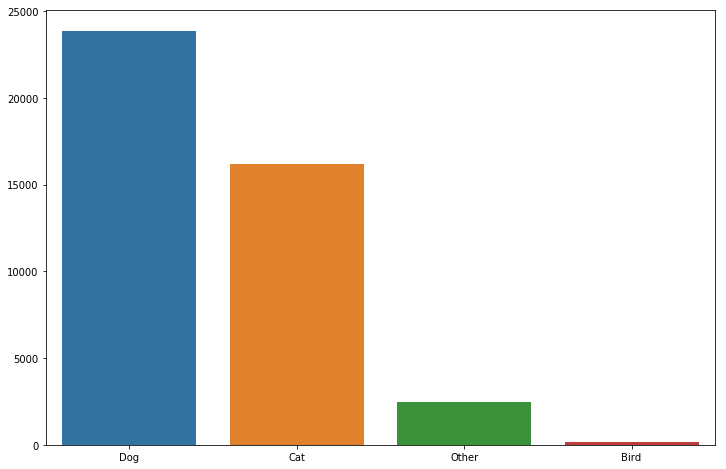

In [721]:
animal_intake = train['animal_type'].value_counts().head(15)
plt.figure(figsize=(12,8))
sns.barplot(animal_intake.index, animal_intake.values)

#### This makes Dogs- '0' , Cats - '1' , Others - '2' , Birds - '3'  and we also observe that  the amount of Birds is nearly negligible

In [722]:
animaltype = train.animal_type.unique()
my_dict={}
func(animaltype)
data = [train,test]
for dataset in data:
    dataset['animal_type_numeric'] = dataset['animal_type'].map(my_dict)

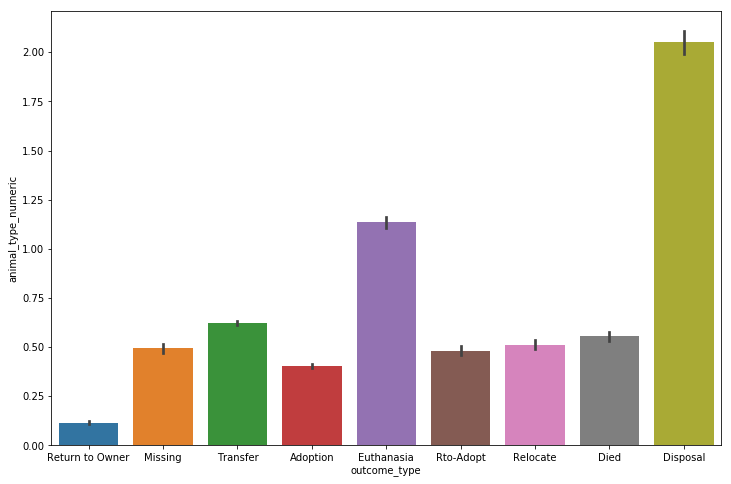

In [723]:
plt.figure(figsize=(12,8))
sns.barplot(x='outcome_type',y='animal_type_numeric',data=train)

#### We obserse that outcome of most of  'Other Animals' is  'Disposal'  while animals which are  'Returned to Owner'  are mostly 'Dogs'

### Age upon Intake vs Animal Type

#### We observe that Dogs are mostly of average age 3 years during Intake while all other animals average age is between 1-2 years

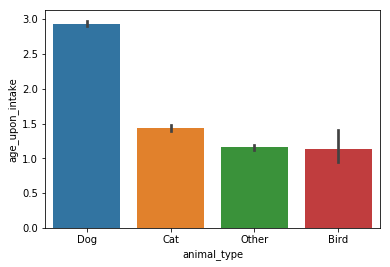

In [724]:
sns.barplot(x='animal_type', y='age_upon_intake',data=train)

### Analyzing Breed of Animals

In [725]:
breeds = train.breed.unique().tolist()
breeds1 = test.breed.unique().tolist()
breeds_new = set( breeds + breeds1 ) 

#### We observe the Top 10 breeds of the animals

In [726]:
train['breed'].value_counts().head(10)

Domestic Shorthair Mix       12752
Pit Bull Mix                  2988
Chihuahua Shorthair Mix       2676
Labrador Retriever Mix        2083
Domestic Medium Hair Mix      1218
German Shepherd Mix            899
Domestic Longhair Mix          788
Bat Mix                        744
Siamese Mix                    583
Australian Cattle Dog Mix      575
Name: breed, dtype: int64

In [727]:
dogs = train[train['animal_type_numeric']==0]
cats = train[train['animal_type_numeric']==1]
dogs['breed'].value_counts().head(5)

Pit Bull Mix                 2988
Chihuahua Shorthair Mix      2676
Labrador Retriever Mix       2083
German Shepherd Mix           899
Australian Cattle Dog Mix     575
Name: breed, dtype: int64

In [728]:
cats['breed'].value_counts().head(5)

Domestic Shorthair Mix      12752
Domestic Medium Hair Mix     1218
Domestic Longhair Mix         788
Siamese Mix                   583
Domestic Shorthair            210
Name: breed, dtype: int64

#### We observed that there were more Dogs than Cats.  Here we saw that almost all cats are of Domestic Shorthair breed. While breed of Dogs is varying with Pit Bull Mix being highest

#### Total breeds in the data

In [729]:
train_breed = train.breed.unique()
print(train_breed.size)
type(train_breed)

1847


numpy.ndarray

In [730]:
test_breed = test.breed.unique()
test_breed.size


1086

In [731]:
all_breeds = set(train_breed.tolist() + test_breed.tolist())
len(all_breeds)

2155

#### This implies the  data contains some breeds of animals that are not present in training or test data

### Colour of animals 

In [732]:
colour = train.color.unique()
print(train_breed.size)
 

1847


In [733]:
colour

array(['Yellow/White', 'Tricolor', 'Brown/White', 'Black/White',
       'Black/Gray', 'White/Black', 'Brown Tabby/White', 'Black/Tan',
       'Tan/Black', 'Black', 'Gold/Gold', 'Sable/White', 'Blue Merle/Tan',
       'Blue Merle', 'Brown/Black', 'Black/Tricolor', 'Gray/White',
       'Black/Black', 'Tan', 'Black/Brown', 'Cream', 'Red', 'Yellow',
       'Gray Tabby/White', 'Brown Merle', 'White', 'White/Brown',
       'Tortie', 'White/Gray Tabby', 'Black/Brown Brindle',
       'Black Smoke/White', 'Brown/Tan', 'Orange Tabby/White',
       'Blue Cream/Tortie', 'Lynx Point', 'Brown/Buff', 'Red Merle',
       'Calico', 'Brown', 'Brown/Cream', 'Blue/White', 'Red/White',
       'Tan/White', 'Lilac Point', 'Gold', 'Brown Tabby', 'Red/Black',
       'Black Brindle', 'Brown/Blue Merle', 'Blue', 'Red/Tan',
       'Black/Red', 'Chocolate', 'Brown Tabby/Agouti', 'Blue Point',
       'Silver Tabby', 'Brown Brindle/White', 'Cream/White',
       'Blue Merle/White', 'White/Liver', 'White/Cream', 'Blue

#### We see combinations like White/White, Brown/Black , Black/Brown which are not unique

### Working on feature Intake Condition

In [734]:
train['intake_condition'].value_counts()

Normal      37001
Injured      2280
Sick         1892
Nursing      1123
Aged          216
Other          91
Feral          57
Pregnant       19
Name: intake_condition, dtype: int64

In [735]:
intake_condition = train.intake_condition.unique()
my_dict={}
func(intake_condition)
data = [train,test]
for dataset in data:
    dataset['intake_condition_numeric'] = dataset['intake_condition'].map(my_dict)

#### Most of the animals are Normal at the time of intake

#### Age vs Intake Condition

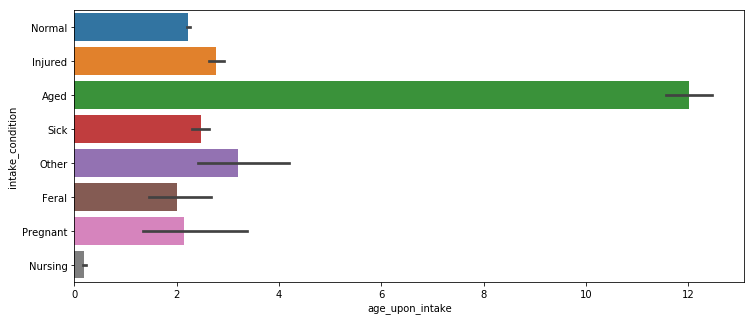

In [736]:
plt.figure(figsize = (12,5))
sns.barplot(train['age_upon_intake'],train['intake_condition'] )

#### This is obvious that Aged animals have age nearly 12 years. It is seen that animals with age between 2-4 years are either Injured or Sick or Other condition

### Visualizing intake Condition of Dogs and Cats

In [737]:
dogs =  train[train['animal_type_numeric'] ==0]
cats =   train[train['animal_type_numeric']==1]

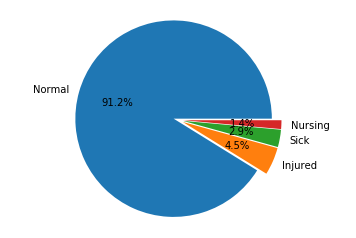

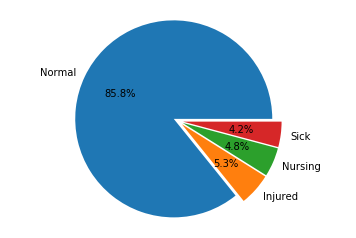

In [738]:
dogs_condition = dogs['intake_condition'].value_counts().head(4)
explode = (0.05, 0.05, 0.05, 0.05 ) 
plt.pie(dogs_condition.values, explode = explode, labels=dogs_condition.index,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

cats_condition = cats['intake_condition'].value_counts().head(4)
explode = (0.05, 0.05, 0.05, 0.05 ) 
plt.pie(cats_condition.values, explode = explode, labels=cats_condition.index,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

#### We observe that %age of animals in Nursing and Sick condition are mostly Cats while more %age animals that are Injured are Dogs.

## Studying Intake type of animals

([<matplotlib.patches.Wedge at 0x1fa9af76b38>,
 [Text(-0.6782232728542358, 0.9287158834427724, 'Stray'),
  Text(0.3309198722845638, -1.1013591776197118, 'Owner Surrender'),
  Text(1.018581610626073, -0.5338459538990582, 'Public Assist'),
  Text(1.1381189508692264, -0.16487951259126166, 'Wildlife')],
 [Text(-0.38334358900456794, 0.5249263689024365, '70.1%'),
  Text(0.18704166694344912, -0.6225073612633154, '19.1%'),
  Text(0.5757200407886498, -0.3017390174212068, '6.2%'),
  Text(0.6432846244043453, -0.09319276798636526, '4.6%')])

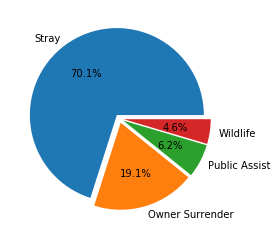

In [739]:
intake_type = train['intake_type'].value_counts().head(4)
explode = (0.05,0.05,0.05,0.05)
plt.pie(intake_type.values, labels=intake_type.index, autopct='%1.1f%%', explode = explode)

#### Majority of Animals are Stray or are Surredered by Owners. So we can explore more about them.

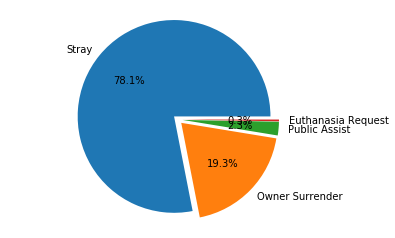

In [740]:
dogs_type = cats['intake_type'].value_counts().head(4)
explode = (0.05, 0.05, 0.05, 0.05 ) 
plt.pie(dogs_type.values, explode = explode, labels=dogs_type.index,autopct='%1.1f%%')
plt.axis('equal')
plt.show()


### Breed of Stray animals

In [741]:
dogs_stray = dogs[dogs['intake_type']=='Stray']
cats_stray = cats[cats['intake_type']=='Stray']

In [742]:
dogs_stray['breed'].value_counts().head(10)

Pit Bull Mix                 2010
Chihuahua Shorthair Mix      1908
Labrador Retriever Mix       1532
German Shepherd Mix           622
Australian Cattle Dog Mix     392
Dachshund Mix                 342
Miniature Poodle Mix          284
Boxer Mix                     245
Border Collie Mix             217
Rat Terrier Mix               184
Name: breed, dtype: int64

#### Majority of Stray Cats are of breed : Domestic Shorthair Mix

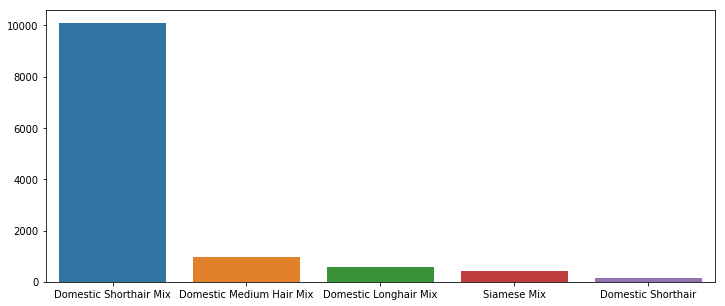

In [743]:
catsstray = cats_stray['breed'].value_counts().head(5)
plt.figure(figsize = (12,5))
sns.barplot(catsstray.index, catsstray.values)

In [744]:
dogs_surrendered = dogs[dogs['intake_type']=='Owner Surrender']
cats_surrendered = cats[cats['intake_type']=='Owner Surrender']
dogs_surrendered['breed'].value_counts().head(10)

Pit Bull Mix                     558
Chihuahua Shorthair Mix          526
Labrador Retriever Mix           383
German Shepherd Mix              176
Australian Cattle Dog Mix        123
Dachshund Mix                     95
Border Collie Mix                 93
Boxer Mix                         77
Australian Shepherd Mix           64
Chihuahua Shorthair/Dachshund     46
Name: breed, dtype: int64

In [745]:
cats_surrendered['breed'].value_counts().head(10)

Domestic Shorthair Mix      2364
Domestic Medium Hair Mix     231
Domestic Longhair Mix        162
Siamese Mix                  129
Domestic Shorthair            57
Maine Coon Mix                33
Snowshoe Mix                  26
Manx Mix                      19
Domestic Medium Hair          16
Domestic Longhair             11
Name: breed, dtype: int64

#### We observe no change in results for Dogs and Cats surrendered by Owners

### Intake type and Outcome

In [747]:
intake_type = train.intake_type.unique()
my_dict={}
func(intake_type)
data = [train,test]
for dataset in data:
    dataset['intake_type_numeric'] = dataset['intake_type'].map(my_dict)

In [748]:
intake_type

array(['Stray', 'Owner Surrender', 'Public Assist', 'Euthanasia Request',
       'Wildlife'], dtype=object)

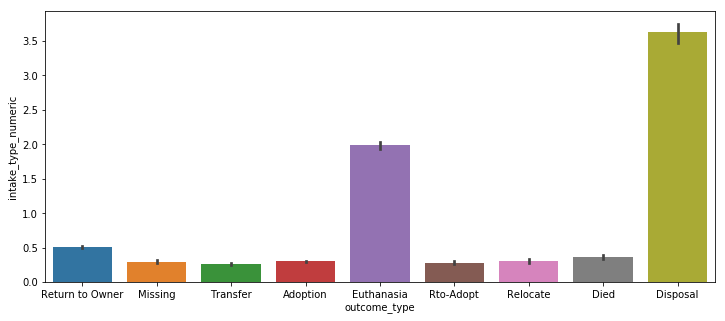

In [749]:
plt.figure(figsize = (12,5))
sns.barplot(x='outcome_type', y='intake_type_numeric' , data = train)

#### Here we can see that most of animals of type 'Euthanasia' and 'Wildlife' have outcome 'Euthanasia' and 'Disposal'.

### I googled 'Euthanasia'. Euthanasia means the painless killing of a patient suffering from an incurable and painful disease or in an irreversible coma.

#### So that's why we can say that most of the time animals of intake_type: 'Euthanasia' will have outcome 'Euthanasia' only

#### So from the graph it can be observed that most of Wildlife animals have outcome 'Disposal'

### Sex upon intake of animals

In [750]:
train.sex_upon_intake.unique()

array(['Neutered Male', 'Spayed Female', 'Intact Female', 'Intact Male',
       'Unknown', nan], dtype=object)

In [751]:
train['sex_upon_intake'].value_counts().head(5)

Intact Male      13233
Intact Female    12373
Neutered Male     7060
Spayed Female     6217
Unknown           3795
Name: sex_upon_intake, dtype: int64

#### Dogs and Cats are Either Intact Male or Intact Female mostly

In [752]:
dogs['sex_upon_intake'].value_counts().head(5)

Intact Male      7459
Intact Female    6462
Neutered Male    5277
Spayed Female    4560
Unknown           110
Name: sex_upon_intake, dtype: int64

In [753]:
cats['sex_upon_intake'].value_counts().head(5)

Intact Female    5781
Intact Male      5545
Neutered Male    1766
Spayed Female    1650
Unknown          1444
Name: sex_upon_intake, dtype: int64

#### Feature that could be related to sex_upon_intake is sex_upon_outcome.

### sex_upon_intake vs sex_upon_outcome

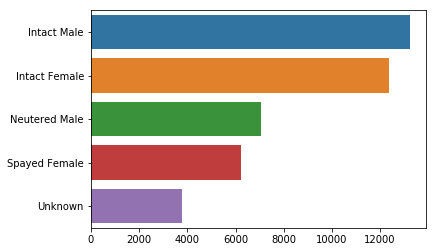

In [754]:
intake_sex = train['sex_upon_intake'].value_counts() 
sns.barplot(intake_sex.values , intake_sex.index)

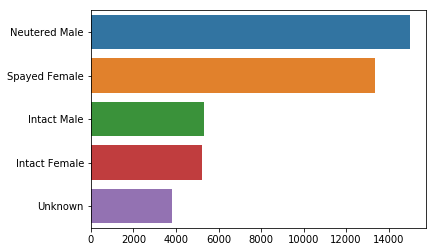

In [755]:
outcome_sex = train['sex_upon_outcome'].value_counts() 
sns.barplot(outcome_sex.values , outcome_sex.index)

#### It is seen that there is high number of changes in the sex of animals. Lets just compare the 2 bar plots by combining.

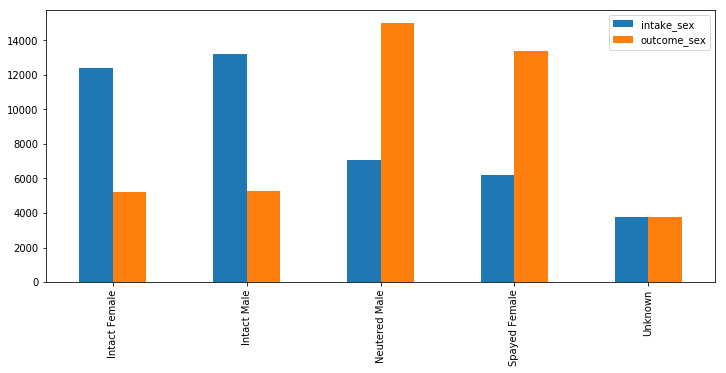

In [756]:
df = pd.DataFrame({'intake_sex' : intake_sex , 'outcome_sex' : outcome_sex})
 
df.plot.bar(figsize = (12,5))

#### High amount of animals got converted into Neutered Male and Spayed Female from Intact Male and Female  

#### Remove 'count' feature as it is same always

In [757]:
train = train.drop('count',axis=1)
test = test.drop('count',axis=1)


#### Convert age upon intake age group and age upon outcome age group feature to numeric classes. Might bhi helpful later.

In [758]:
age_upon_intake_age_group = train.age_upon_intake_age_group.unique()
my_dict={}
func(age_upon_intake_age_group)
data = [train,test]
for dataset in data:
    dataset['age_group'] = dataset['age_upon_intake_age_group'].map(my_dict)

In [759]:
age_upon_outcome_age_group = train.age_upon_outcome_age_group.unique()
my_dict={}
func(age_upon_outcome_age_group)
data = [train,test]
for dataset in data:
    dataset['age_group_outcome'] = dataset['age_upon_outcome_age_group'].map(my_dict)

In [760]:
age_upon_intake_age_group

array(['(7.5, 10.0]', '(15.0, 17.5]', '(12.5, 15.0]', '(17.5, 20.0]',
       '(10.0, 12.5]', '(2.5, 5.0]', '(5.0, 7.5]', '(-0.025, 2.5]',
       '(20.0, 22.5]'], dtype=object)

In [761]:
age_upon_outcome_age_group

array(['(7.5, 10.0]', '(15.0, 17.5]', '(12.5, 15.0]', '(17.5, 20.0]',
       '(10.0, 12.5]', '(2.5, 5.0]', '(5.0, 7.5]', '(-0.025, 2.5]',
       '(20.0, 22.5]'], dtype=object)

In [762]:
train['age_group'].head(10)

0     0
3     0
4     1
5     2
6     2
7     2
8     2
9     3
10    1
11    2
Name: age_group, dtype: int64

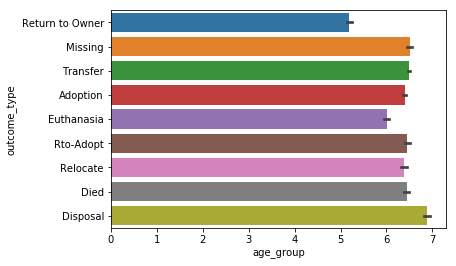

In [763]:
sns.barplot(x='age_group' , y='outcome_type' , data=train)

### Intake and Outcome Time

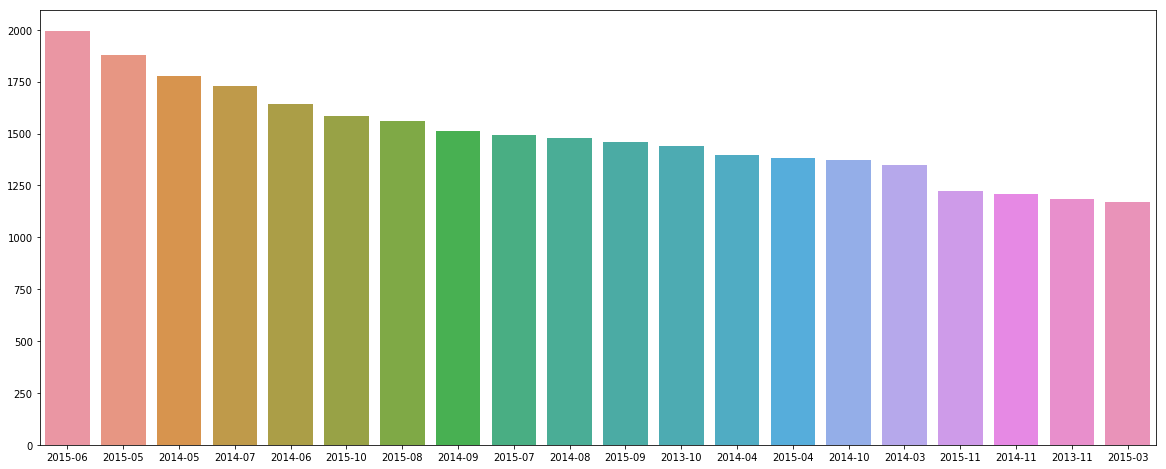

In [764]:
intake = train['intake_monthyear'].value_counts().head(20)
plt.figure(figsize=(20,8))
sns.barplot(intake.index,intake.values)

#### Spikes in year 2015 around May-June in intake animals

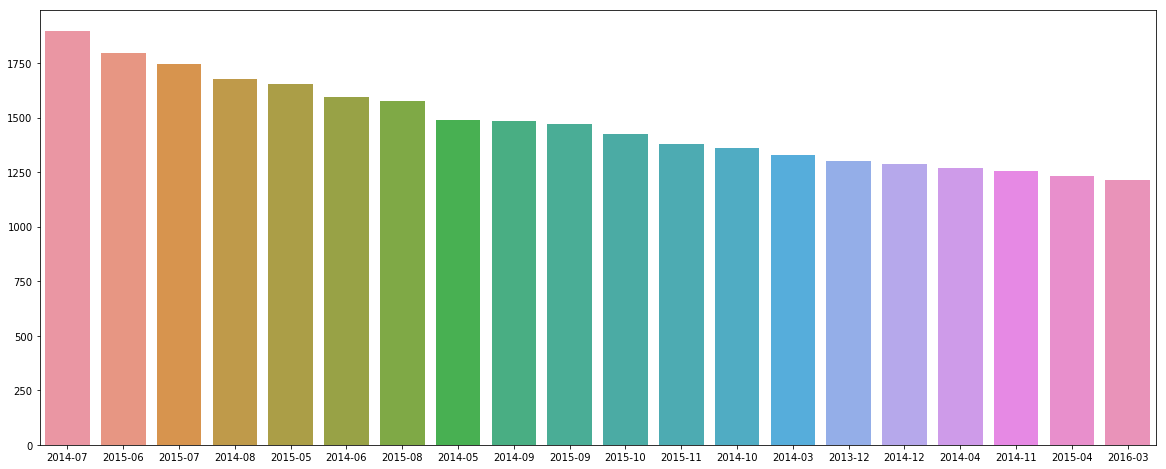

In [765]:
outcome = train['outcome_monthyear'].value_counts().head(20)
plt.figure(figsize=(20,8))
sns.barplot(outcome.index,outcome.values)

#### Most outcomes were in July 2014. In 2015 , May-July period have many outcomes

### This means overall May-July of 2015 was very active for AWC. We can study if something happened at that time?

In [766]:
train['intake_weekday'].value_counts()

Saturday     6648
Monday       6356
Wednesday    6239
Tuesday      6207
Friday       5973
Thursday     5728
Sunday       5528
Name: intake_weekday, dtype: int64

#### More intakes in the center on Saturday Monday and Wednesday 

In [767]:
train['outcome_weekday'].value_counts()

Sunday       6774
Saturday     6730
Tuesday      6238
Monday       6177
Wednesday    5706
Friday       5670
Thursday     5384
Name: outcome_weekday, dtype: int64

#### More outcomes in the center on Sunday Saturday. So Saturday being the most active day.

In [768]:
data = [train,test]
for dataset in data:
    dataset['outcome_weekday'] = dataset['outcome_weekday'].map(my_dict)

In [769]:
intake_weekday = train.intake_weekday.unique()
my_dict={}
func(intake_weekday)
data = [train,test]
for dataset in data:
    dataset['intake_weekday'] = dataset['intake_weekday'].map(my_dict)

### Time in Shelter

#### We have a feature time_in_shelter_days. So remove time_in_shelter

In [771]:
train = train.drop('time_in_shelter',axis=1)
test = test.drop('time_in_shelter',axis=1)


In [772]:
train['time_in_shelter_days'].value_counts().head(10)

0.009028    55
0.005556    50
0.009722    50
0.008333    50
0.013194    49
0.014583    49
0.031250    48
0.007639    48
0.011806    47
0.020139    47
Name: time_in_shelter_days, dtype: int64

#### Value counts are very small in such big data. Can not deduce anything from it.

### Time in Shelter vs outcome_type

### For Dogs

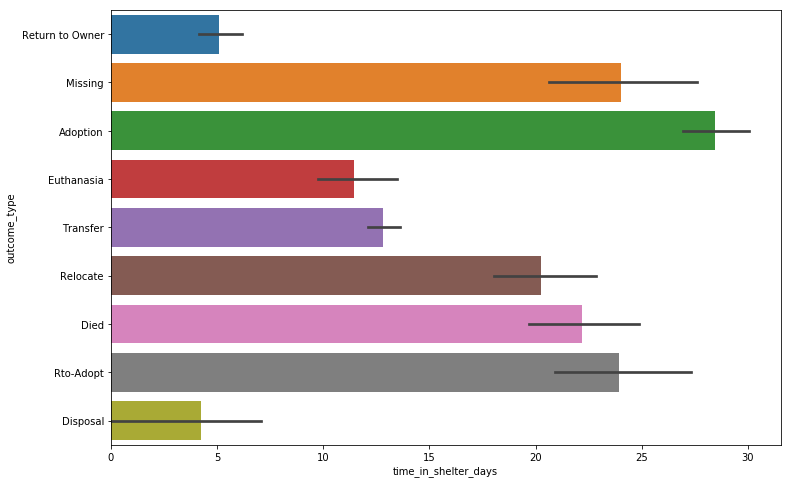

In [773]:
plt.figure(figsize=(12,8))
sns.barplot(x='time_in_shelter_days' , y ='outcome_type' ,data=train[train['animal_type']=='Dog'])

### For Cats

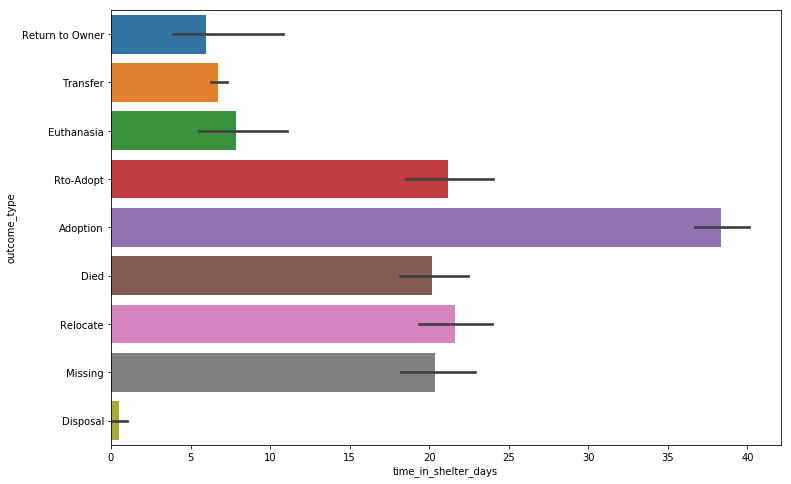

In [774]:
plt.figure(figsize=(12,8))
sns.barplot(x='time_in_shelter_days' , y ='outcome_type' ,data=train[train['animal_type']=='Cat'])

#### 1. Animals who spend more time in shelter have good Outcome like Adoption or Returned to Owner
#### 2. Cats spend avg. time 35+ days while Dogs 20-25 days for Adoption or Returned to Owner

### Drop some unnecessary columns

In [775]:
train = train.drop(['age_upon_outcome','date_of_birth','age_upon_outcome_(days)','outcome_hour','intake_hour'],axis=1)
test = test.drop(['age_upon_outcome','date_of_birth','age_upon_outcome_(days)','outcome_hour','intake_hour'],axis=1)


### Feature to be predicted : outcome_type

In [777]:
train['outcome_type'].value_counts()

Adoption           11198
Transfer           10075
Return to Owner     7562
Euthanasia          4135
Died                2613
Missing             2358
Relocate            2339
Rto-Adopt           2221
Disposal             178
Name: outcome_type, dtype: int64

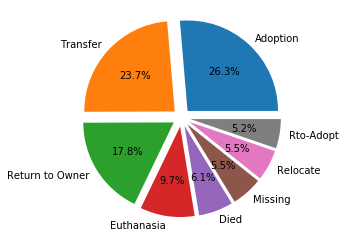

In [778]:
outcome = train['outcome_type'].value_counts().head(8)
explode = (0.1, 0.1, 0.1, 0.1  ,0.1, 0.1, 0.1, 0.1 ) 
plt.pie(outcome.values, explode = explode, labels=outcome.index,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

#### Most animals are Adopted or Transfered or Returned to Owner

### Dogs

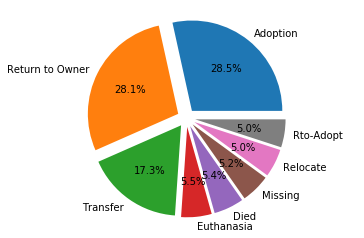

In [779]:
outcome = dogs['outcome_type'].value_counts().head(8)
explode = (0.1, 0.1, 0.1, 0.1  ,0.1, 0.1, 0.1, 0.1 ) 
plt.pie(outcome.values, explode = explode, labels=outcome.index,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

### Cats

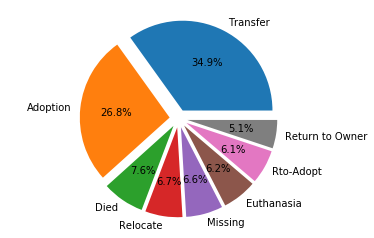

In [780]:
outcome = cats['outcome_type'].value_counts().head(8)
explode = (0.1, 0.1, 0.1, 0.1  ,0.1, 0.1, 0.1, 0.1 ) 
plt.pie(outcome.values, explode = explode, labels=outcome.index,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

#### Comparison between Dogs and Cats
#### 1. %age wise Dogs are adopted more than Cats
#### 2. Less %age of Cats are transferred

In [781]:
mapping = {'Return to Owner':0, 'Missing':1, 'Transfer':2, 'Adoption':3, 'Euthanasia':4,'Rto-Adopt':5, 'Relocate':6, 'Died':7, 'Disposal':8}

In [782]:
data1=[train]
for dataset in data1:
    dataset["outcome_type"]=dataset["outcome_type"].map(mapping)

### Breed vs Outcome Type

### Cats

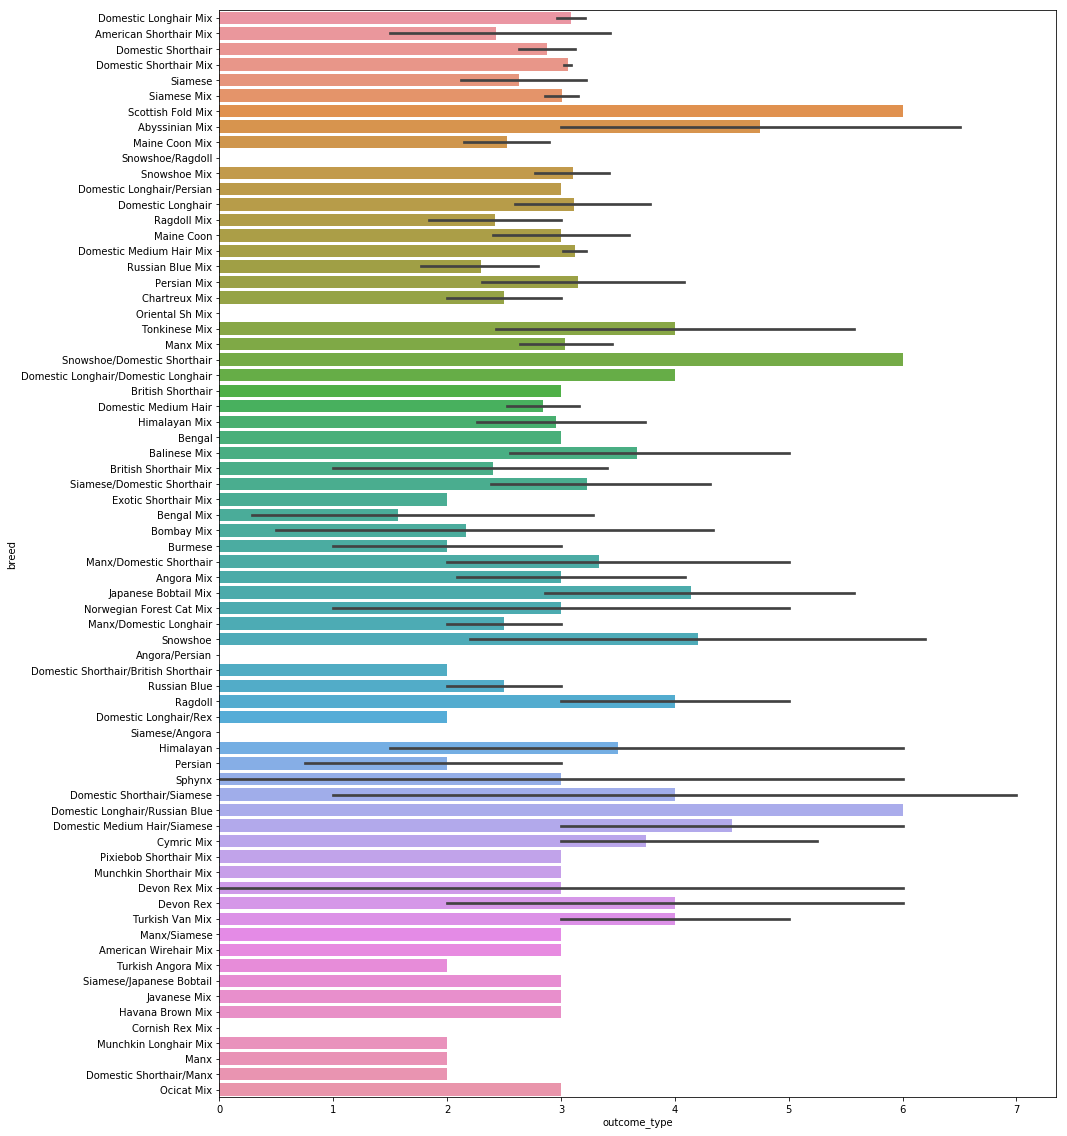

In [783]:
plt.figure(figsize=(15,20))

sns.barplot(x='outcome_type' , y ='breed' ,data=train[train['animal_type_numeric']==1])

### Converting Data Types so that we can fed it into Models

In [784]:
train['sex_upon_outcome'].value_counts() 

Neutered Male    14997
Spayed Female    13381
Intact Male       5296
Intact Female     5209
Unknown           3795
Name: sex_upon_outcome, dtype: int64

In [785]:
train['sex_upon_intake'].value_counts() 

Intact Male      13233
Intact Female    12373
Neutered Male     7060
Spayed Female     6217
Unknown           3795
Name: sex_upon_intake, dtype: int64

In [786]:
sex  = {'Intact Male': 0 ,'Intact Female': 1 ,'Neutered Male': 2 ,'Spayed Female': 3 ,'Unknown': 4  }

In [787]:
data=[train,test]
for dataset in data:
    dataset["sex_upon_intake"]=dataset["sex_upon_intake"].map(sex)
    dataset["sex_upon_outcome"]=dataset["sex_upon_outcome"].map(sex)
    

In [788]:
train = train.drop(['intake_monthyear','outcome_monthyear'],axis=1)
test = test.drop(['intake_monthyear','outcome_monthyear'],axis=1)

#### Converting Breeds to numeric classes

In [789]:
all_breeds

{'Jack Russell Terrier/Boston Terrier',
 'Pekingese/Maltese',
 'Pug',
 'Labrador Retriever/Australian Cattle Dog',
 'Smooth Fox Terrier/Chihuahua Shorthair',
 'Yorkshire Terrier/Shih Tzu',
 'Rat Terrier/Pointer',
 'Dogue De Bordeaux/American Bulldog',
 'Jack Russell Terrier/Whippet',
 'Miniature Schnauzer/Labrador Retriever',
 'Rabbit Lh',
 'Collie Rough/Golden Retriever',
 'Dachshund/Havanese',
 'Catahoula/Great Dane',
 'Great Pyrenees/Rottweiler',
 'Rhod Ridgeback/Pointer',
 'Keeshond/Finnish Spitz',
 'Australian Shepherd/Parson Russell Terrier',
 'American Eskimo/Alaskan Husky',
 'Miniature Schnauzer/Pug',
 'Siberian Husky/Chinese Sharpei',
 'Chesa Bay Retr Mix',
 'Yorkshire Terrier/Chinese Crested',
 'Rat Terrier/Beagle',
 'Border Collie/Pembroke Welsh Corgi',
 'Catahoula/Labrador Retriever',
 'Jindo/Labrador Retriever',
 'American Foxhound/Pointer',
 'Pug/Beagle',
 'Basset Hound/Dachshund',
 'Boston Terrier/Miniature Schnauzer',
 'Chihuahua Longhair/Yorkshire Terrier',
 'Rottweile

In [790]:
breed_dict={}
x=0;
for i in all_breeds:
    d={}
    d.update({i : x})
    breed_dict.update(d)
    x=x+1
    

In [791]:
data=[train,test]
for dataset in data:
    dataset["breed"]=dataset["breed"].map(breed_dict)

In [792]:
train = train.drop('animal_id_outcome',axis=1)

#### Drop intake number and outcome number as they are always same

In [793]:
test['outcome_number'].value_counts()

1    29302
2     2096
3      363
4       76
5       21
6        7
7        3
8        1
Name: outcome_number, dtype: int64

In [794]:
test['intake_number'].value_counts()

1    29302
2     2096
3      363
4       76
5       21
6        7
7        3
8        1
Name: intake_number, dtype: int64

In [795]:
train = train.drop(['intake_number','outcome_number'],axis=1)
test = test.drop(['intake_number','outcome_number'],axis=1)

### Correlation Matrix

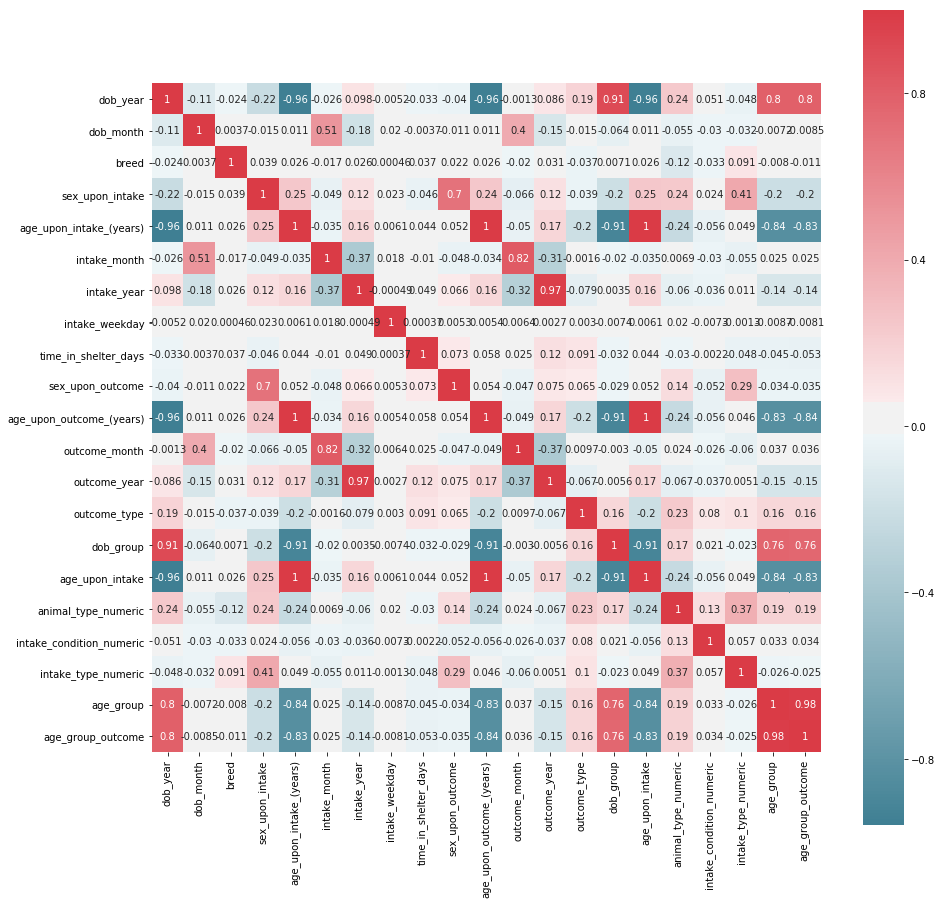

In [799]:
f, ax = plt.subplots(figsize=(15, 15))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)
plt.show()

In [800]:
corr['outcome_type']

dob_year                    0.186020
dob_month                  -0.014821
breed                      -0.037307
sex_upon_intake            -0.038513
age_upon_intake_(years)    -0.199891
intake_month               -0.001615
intake_year                -0.078808
intake_weekday              0.002963
time_in_shelter_days        0.090523
sex_upon_outcome            0.064812
age_upon_outcome_(years)   -0.197599
outcome_month               0.009727
outcome_year               -0.066980
outcome_type                1.000000
dob_group                   0.160079
age_upon_intake            -0.199891
animal_type_numeric         0.232885
intake_condition_numeric    0.080169
intake_type_numeric         0.101959
age_group                   0.158755
age_group_outcome           0.158093
Name: outcome_type, dtype: float64

#### We can see animal type , dob_year , age_group are somewhat correlated with outcome_type

In [833]:
X = train.drop('outcome_type',axis=1)
y = train['outcome_type']

### Polynomial Feature Engineering

In [802]:
corr = train.corr()
corr['outcome_type']

dob_year                    0.186020
dob_month                  -0.014821
breed                      -0.037307
sex_upon_intake            -0.038513
age_upon_intake_(years)    -0.199891
intake_month               -0.001615
intake_year                -0.078808
intake_weekday              0.002963
time_in_shelter_days        0.090523
sex_upon_outcome            0.064812
age_upon_outcome_(years)   -0.197599
outcome_month               0.009727
outcome_year               -0.066980
outcome_type                1.000000
dob_group                   0.160079
age_upon_intake            -0.199891
animal_type_numeric         0.232885
intake_condition_numeric    0.080169
intake_type_numeric         0.101959
age_group                   0.158755
age_group_outcome           0.158093
Name: outcome_type, dtype: float64

#### Get Top 5 most correlated features 

In [803]:
train_new = train[['dob_year' , 'age_group' ,'animal_type_numeric' ,'dob_group' ,'intake_type_numeric']]

In [804]:
train_new.shape

(42679, 5)

#### Square them and take all combinations. Done using PolynomialFeatures

In [805]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(interaction_only=True)
train_new = poly.fit_transform(train_new)
train_new.shape

(42679, 16)

In [806]:
train_new = pd.DataFrame(train_new)

In [807]:
train_new['outcome'] = train['outcome_type']
corr = train_new.corr()
corr['outcome']

0               NaN
1          0.065874
2          0.056353
3          0.032756
4          0.057021
5         -0.006292
6          0.056495
7          0.032796
8          0.057189
9         -0.006236
10         0.037763
11         0.062442
12         0.003201
13         0.035394
14         0.011292
15        -0.001402
outcome    1.000000
Name: outcome, dtype: float64

#### Does not obtain correlated features using this

### Model Selection

In [808]:
from sklearn.model_selection import train_test_split

In [834]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [835]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,f1_score,classification_report

In [836]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

Y_pred = decision_tree.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_pred)))
print('Accuracy:', accuracy_score(y_test, Y_pred))  
f1_score(y_test, Y_pred ,average='macro')


Mean Absolute Error: 1.4916822867853796
Mean Squared Error: 5.24238519212746
Root Mean Squared Error: 2.2896255571877817
Accuracy: 0.4541940018744142


0.33579721727074957

In [837]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

Y_pred = rfc.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_pred)))
print('Accuracy:', accuracy_score(y_test, Y_pred))  
f1_score(y_test, Y_pred ,average='macro')

G:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean Absolute Error: 1.2031982193064668
Mean Squared Error: 4.070934864104967
Root Mean Squared Error: 2.0176557843460237
Accuracy: 0.5405342080599812


0.3539151873482229

In [838]:
rfc.feature_importances_

array([0.0298511 , 0.05868822, 0.07939427, 0.03661506, 0.03535756,
       0.05300153, 0.02235458, 0.06784416, 0.22532458, 0.06635585,
       0.0410117 , 0.05456053, 0.02182628, 0.00358923, 0.04316694,
       0.0371936 , 0.02407801, 0.08431983, 0.00703522, 0.00843173])

In [839]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78      3118
           1       0.07      0.04      0.05       937
           2       0.50      0.59      0.54      3978
           3       0.52      0.70      0.60      4462
           4       0.76      0.66      0.71      1639
           5       0.05      0.02      0.03       897
           6       0.07      0.02      0.04       906
           7       0.10      0.04      0.05      1059
           8       0.66      0.28      0.39        76

    accuracy                           0.54     17072
   macro avg       0.39      0.35      0.35     17072
weighted avg       0.48      0.54      0.50     17072



In [840]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

Y_pred = gbc.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_pred)))
print('Accuracy:', accuracy_score(y_test, Y_pred))  
f1_score(y_test, Y_pred ,average='weighted')

Mean Absolute Error: 0.9960754451733833
Mean Squared Error: 3.1596180880974694
Root Mean Squared Error: 1.777531459102052
Accuracy: 0.5978795688847235


0.5285583250886711

In [841]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_pred)))
print('Accuracy:', accuracy_score(y_test, Y_pred))  
f1_score(y_test, Y_pred ,average='weighted')

Mean Absolute Error: 1.4830131208997188
Mean Squared Error: 5.172211808809747
Root Mean Squared Error: 2.274249724372798
Accuracy: 0.43978444236176195


0.41350642727028697

In [842]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [843]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, Y_pred))  
print('Mean Squared Error:', mean_squared_error(y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_pred)))
print('Accuracy:', accuracy_score(y_test, Y_pred))  
f1_score(y_test, Y_pred ,average='weighted')

G:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
G:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Mean Absolute Error: 1.2635309278350515
Mean Squared Error: 4.21538191190253
Root Mean Squared Error: 2.053139525678304
Accuracy: 0.5174554826616682


G:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4505574656289475

In [844]:
outcome_id = test['animal_id_outcome']

In [845]:
test = test.drop('animal_id_outcome',axis=1)

### Submission

In [848]:

out = gbc.predict(test)

In [849]:
mapping

{'Return to Owner': 0,
 'Missing': 1,
 'Transfer': 2,
 'Adoption': 3,
 'Euthanasia': 4,
 'Rto-Adopt': 5,
 'Relocate': 6,
 'Died': 7,
 'Disposal': 8}

In [850]:
outcome_type = dict(map(reversed, mapping.items()))

In [851]:
outcome_type

{0: 'Return to Owner',
 1: 'Missing',
 2: 'Transfer',
 3: 'Adoption',
 4: 'Euthanasia',
 5: 'Rto-Adopt',
 6: 'Relocate',
 7: 'Died',
 8: 'Disposal'}

In [852]:
out

array([3, 3, 3, ..., 4, 2, 0], dtype=int64)

In [853]:
new_outcome=[]
for i in out:
    a = outcome_type[i]
    new_outcome.append(a)
    

In [854]:
out_df = pd.DataFrame({'animal_id_outcome' : outcome_id , 'outcome_type':new_outcome})

In [855]:
out_df.to_csv('submission.csv',index=False)